In [6]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

*Wigner's Friend* is a thought experiment that was first proposed by Eugene Wigner in 1961, a variation of Schrödinger's Cat. In Wigner's Friend, only extended to include **two observers,** one of whom is inside a laboratory and the other outside. Here, Wigner's friend is inside the laboratory and Wigner is outside.

Let's model this system initially using a Plus State Qubit $$\ket{+}=\frac 1{\sqrt 2}(\ket{0}+\ket{1})$$

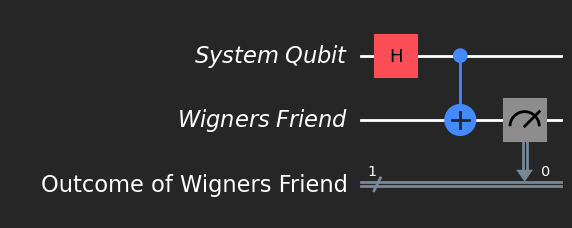

In [5]:
qr_1 = QuantumRegister(1, 'System Qubit')
qr_2 = QuantumRegister(1, 'Wigners Friend')
cr_1 = ClassicalRegister(1, 'Outcome of Wigners Friend')

qc_1 = QuantumCircuit(qr_1, qr_2, cr_1)
qc_1.h(0)
qc_1.cx(0, 1)
qc_1.measure(1, 0)

qc_1.draw('mpl', style = 'iqx-dark')

Wigner's Friend is inside the laboratory, and records the entangled Bell State $$\ket{\Phi^+}=\frac 1{\sqrt 2}(\ket{0}+\ket{1})\otimes\ket{0}=\frac 1{\sqrt 2}(\ket{00}+\ket{11})$$ after application of the CNOT Gate.

Wigner's Friend Observes:  {'1': 513, '0': 511}


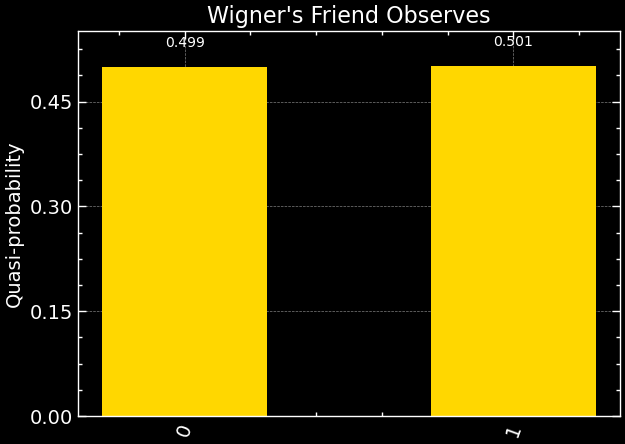

In [7]:
backend = AerSimulator()
result = backend.run(qc).result()

print("Wigner's Friend Observes: ", result.get_counts())
plot_distribution(result.get_counts(), title = "Wigner's Friend Observes", color = 'gold')

Until now, Wigner's qubit is isolated, and the entangled state of the system is not known to Wigner. Now, Wigner measures the state of the system, and the state collapses to either $\ket{00}$ or $\ket{11}$. The contradiction is that Wigner's Friend has already measured the state of the system, and the state should have collapsed to $\ket{00}$ or $\ket{11}$ **before** Wigner's measurement. From Wigner's Friend's perspective, the state of the system has already collapsed, but from Wigner's perspective, the state of the system is still in a superposition.

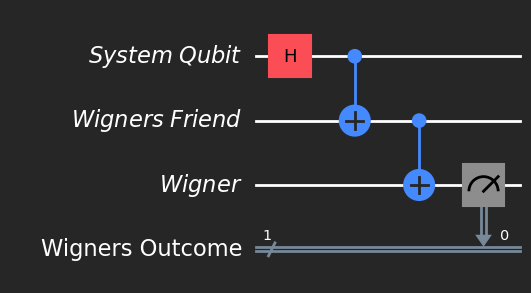

In [8]:
qr_3 = QuantumRegister(1, 'Wigner')
cr_2 = ClassicalRegister(1, 'Wigners Outcome')

qc_2 = QuantumCircuit(qr_1, qr_2, qr_3, cr_2)
qc_2.h(0)
qc_2.cx(0, 1)
qc_2.cx(1, 2)
qc_2.measure(2, 0)

qc_2.draw('mpl', style = 'iqx-dark')

Wigner Observes:  {'0': 524, '1': 500}


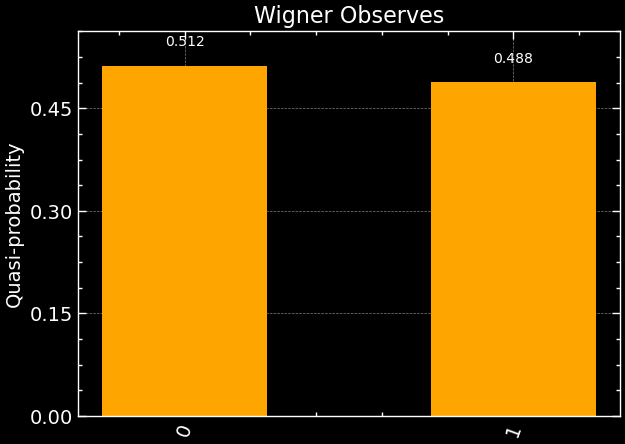

In [9]:
result = backend.run(qc_2).result()

print("Wigner Observes: ", result.get_counts())
plot_distribution(result.get_counts(), title = "Wigner Observes", color = 'orange')

Hence, Wigner also observes that the state of the system has collapsed, and the state of the system is in a superposition from his perspective. This leads to a contradiction, and the question arises: *When does the state of the system collapse?*

# 1. From Wigner's Friend's Perspective:

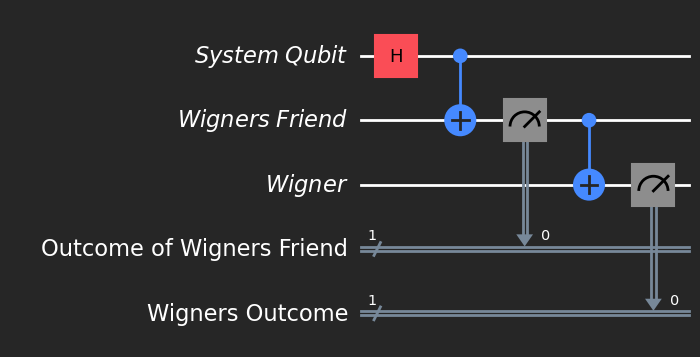

In [10]:
qc_3 = QuantumCircuit(qr_1, qr_2, qr_3, cr_1, cr_2)

qc_3.h(0)
qc_3.cx(0, 1)
qc_3.measure(qr_2, cr_1)
qc_3.cx(1, 2)
qc_3.measure(qr_3, cr_2)

qc_3.draw('mpl', style = 'iqx-dark')

# 2. From Wigner's Perspective:

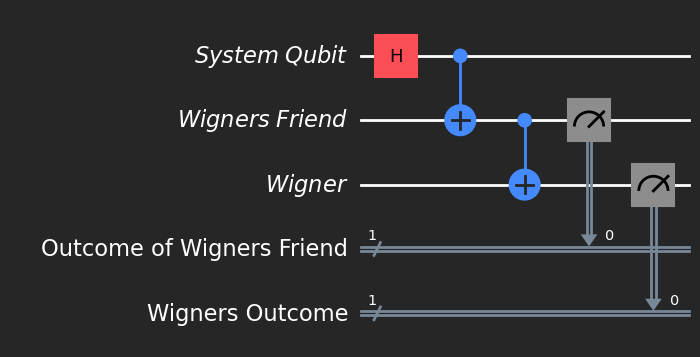

In [11]:
qc_4 = QuantumCircuit(qr_1, qr_2, qr_3, cr_1, cr_2)

qc_4.h(0)
qc_4.cx(0, 1)
qc_4.cx(1, 2)
qc_4.measure(qr_2, cr_1)
qc_4.measure(qr_3, cr_2)

qc_4.draw('mpl', style = 'iqx-dark')

Comparing the two perspectives, they disagree on the positions of the irreverible measurements; whether they occur **before or after** the CNOT Gate operation on Wigner' Friend's Qubit. The *Principle of Third Measurement* in Quantum Computing tells us that this order is indeterminate, and the measurement outcomes are **identical** for both observers:

Wigner's Friend Observes:  {'0 0': 505, '1 1': 519}


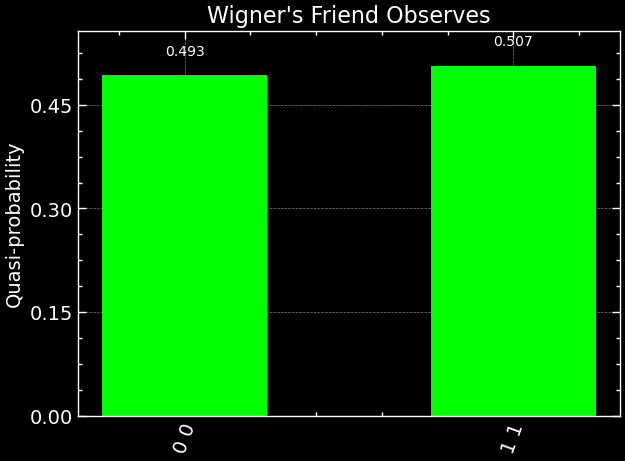

In [13]:
result = backend.run(qc_3).result()

print("Wigner's Friend Observes: ", result.get_counts())
plot_distribution(result.get_counts(), title = "Wigner's Friend Observes", color = 'lime')

Wigner Observes:  {'0 0': 516, '1 1': 508}


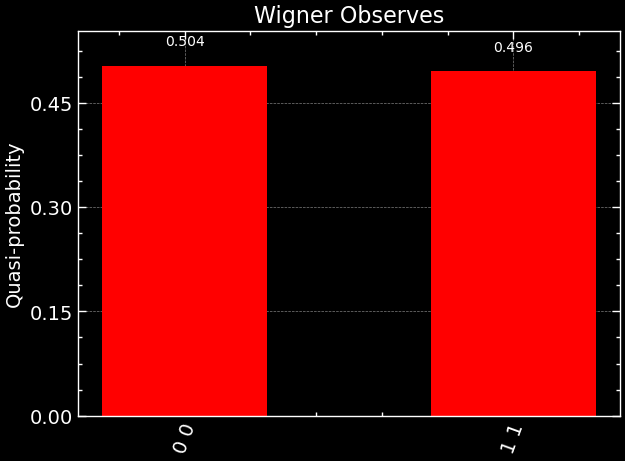

In [14]:
result = backend.run(qc_4).result()

print("Wigner Observes: ", result.get_counts())
plot_distribution(result.get_counts(), title = "Wigner Observes", color = 'red')

Copenhagen's Interpretation of the wavefunction due to its vagueness in defining how measurements are actually made, **cannot suffice** to explain this paradox. The Many-Worlds Interpretation, which states that the wavefunction never collapses, and the wavefunction of the universe is always in a superposition, **also** cannot explain this paradox. The Many-Worlds Interpretation is a deterministic theory, and the paradox is a result of the indeterminacy of the order of measurements.

One potential resolution is getting rid of irreversible measurement operations altogether, treating all measurements as **unitary operations.** This is the basis of the **Quantum Bayesianism** interpretation, which states that the wavefunction is a subjective measure of the observer's knowledge of the system. This interpretation is still under development, and is not widely accepted.

A circuit loosely based on this interpretation follows:

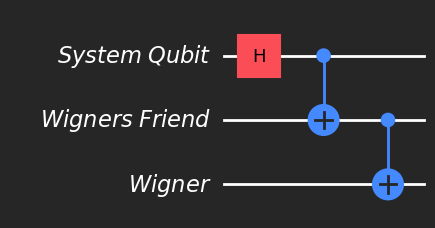

In [15]:
qc_5 = QuantumCircuit(qr_1, qr_2, qr_3)

qc_5.h(0)
qc_5.cx(0, 1)
qc_5.cx(1, 2)

qc_5.draw('mpl', style = 'iqx-dark')

Getting rid of the irreversible measurement operations, we can model the system as a unitary operation on the qubits. The qubits are initialized in the $\ket{+}$ state, and the CNOT Gate is applied to the qubits. The qubits are then measured, and the measurement outcomes are identical for both observers. What results is the state $$\frac 1{\sqrt 2}(\ket{0}+\ket{1})\otimes\ket{0}\otimes\ket{0}=\ket{\Phi^+}\otimes\ket{0}=\frac 1{\sqrt 2}(\ket{000}+\ket{111})$$